In [209]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [210]:
np.random.RandomState(12345)

In [211]:

#cs = ["slide_21","slide_22","slide_ 26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [212]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)


In [213]:
reload(a2)

<module 'analysis2' from '/home/janek89/Dev/flutype_analysis_web/analysis2.py'>

In [223]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering()

lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



In [224]:


from sklearn.preprocessing import Imputer
imputer = Imputer()
data = a2.Data(spots_dj=spots_dj, impute=True).outlier_filtering()


/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



In [226]:
pd.DataFrame(imputed_x, index=data.x.index, columns=data.x.columns)


Ligand Batch                                                     LF-0.0001  \
Analyte Batch                      Collection          Replica               
A/Aichi/2/68(H3N2)-X31-2018-04-13  2018_03_21_slide_58 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
                                   2018_03_21_slide_63 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
                                   2018_03_21_slide_64 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
A/Beijing/32/1992(H3N2)-2018-04-13 2018_03_21_slide_40 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
...                                                                    ...   
Mi45-2018-04-13                    2018_03_21_slide_61 6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
VicAlla-2018-04-13                 2018_03_21_slide_67 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
                                   2018_03_21_slide_68 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                      

In [227]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Replica
2914,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),1431.814059,3586.152509,0.333333,2018_03_21_slide_44,microarray_2018_03_21,38.0,14.0,0.0
5624,LF-0.0001,0.0001,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),1223.637224,6106.499414,0.312500,2018_03_21_slide_50,microarray_2018_03_21,7.0,14.0,0.0
3388,LF-0.0001,0.0001,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),2894.283912,6809.464640,0.390625,2018_03_21_slide_56,microarray_2018_03_21,26.0,8.0,0.0
3091,LF-0.0001,0.0001,LF,Mi45-2018-04-13,Mi45,205.411765,241.230652,0.333333,2018_03_21_slide_60,microarray_2018_03_21,26.0,8.0,0.0
139,LF-0.0001,0.0001,LF,Mi45-2018-04-13,Mi45,2437.492754,6912.906230,0.312500,2018_03_21_slide_61,microarray_2018_03_21,38.0,14.0,0.0
4965,LF-0.0001,0.0001,LF,A/Hong Kong/4801/2014(H3N2)-2018-04-13,A/Hong Kong/4801/2014(H3N2),47553.331230,18710.357268,0.390625,2018_03_21_slide_62,microarray_2018_03_21,32.0,11.0,0.0
4338,LF-0.0001,0.0001,LF,A/Victoria/361/2011(H3N2)-2018-04-13,A/Victoria/361/2011(H3N2),11207.798107,15775.949758,0.312500,2018_03_21_slide_65,microarray_2018_03_21,32.0,11.0,0.0
3912,LF-0.001,1.0000,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),4107.116719,9618.952261,0.328125,2018_03_21_slide_37,microarray_2018_03_21,45.0,1.0,0.0
3044,LF-0.001,1.0000,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),2333.558344,2010.274281,0.583333,2018_03_21_slide_44,microarray_2018_03_21,57.0,7.0,0.0
3730,LF-0.001,1.0000,LF,A/Aichi/2/68(H3N2)-X31-2018-04-13,A/Aichi/2/68(H3N2)-X31,7638.984227,12284.083761,0.312500,2018_03_21_slide_58,microarray_2018_03_21,20.0,4.0,0.0


In [228]:
data.x

Ligand Batch                                                     LF-0.0001  \
Analyte Batch                      Collection          Replica               
A/Aichi/2/68(H3N2)-X31-2018-04-13  2018_03_21_slide_58 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
                                   2018_03_21_slide_63 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
                                   2018_03_21_slide_64 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
A/Beijing/32/1992(H3N2)-2018-04-13 2018_03_21_slide_40 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
...                                                                    ...   
Mi45-2018-04-13                    2018_03_21_slide_61 6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
VicAlla-2018-04-13                 2018_03_21_slide_67 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                                                       6.0      9564.82415   
                                                       7.0      9564.82415   
                                                       8.0      9564.82415   
                                   2018_03_21_slide_68 0.0      9564.82415   
                                                       1.0      9564.82415   
                                                       2.0      9564.82415   
                                                       3.0      9564.82415   
                                                       4.0      9564.82415   
                                                       5.0      9564.82415   
                      

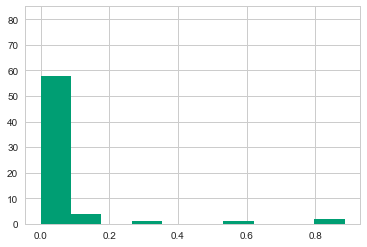

In [229]:
plt.hist(lb)
plt.show()

In [230]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]


In [231]:
col = data.spots_pd["Collection"].unique()

train_test =[ tuple(col),tuple(col)]


In [232]:
cs = data.spots_pd["Collection"].unique()

In [233]:

complete = pd.DataFrame(columns=["Test", "Train"])
import itertools

test = list(itertools.product(*data.collection_in_virbatch().values()))

for i, row in enumerate(test[:50]):
    complete.set_value(i, "Test", row)
    complete.set_value(i, "Train", tuple(set(cs) - set(row)))



/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [206]:
complete

,Test,Train
0,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
1,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
2,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
3,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
4,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
5,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
6,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
7,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
8,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."
9,"(2018_03_21_slide_41, 2018_03_21_slide_40, 201...","(2018_03_21_slide_39, 2018_03_21_slide_34, 201..."


In [234]:
pprint(pbs_len)

Pretty printing has been turned ON


In [235]:
frames = []
#spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
data = a2.Data(spots_dj=spots_dj, impute=True)
data = data.outlier_filtering().sample_on_collection(200).clean()

for pb in pbs[:40]:
    ana = a2.Analysis(data.subset_ligand_batches(pb),train_test=complete)
    ana.calculate_all()
    frames.append(ana.complete_information())


/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models****

In [236]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")


In [237]:
result["TrueFalse"].value_counts()

0    3013433
1    2159967
Name: TrueFalse, dtype: int64

In [238]:
one_virus_data = result[result["y"] == "A/Brisbaine/59/2007(H1N1)-2018-03-20"]
values = pd.DataFrame(one_virus_data.groupby("Peptide Batches")["Predictions"].value_counts())
values.index.names = ['Peptide Batches', 'Virus Batch']
data = pd.pivot_table(values, values=["Predictions"],index=["Peptide Batches"],columns=["Virus Batch"])
data.plot()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [239]:
one_virus_data.groupby(["Peptide Batches","Collection"]).apply(lambda x:  np.amax(x["Predictions"]))
one_virus_data
one_virus_data[one_virus_data.index.get_level_values("Peptide Batches") == 20]["Predictions"].value_counts().idxmax()

ValueError: attempt to get argmax of an empty sequence

In [240]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)


In [241]:
#result_m_mean = result_m.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean().reset_index()



In [242]:
result_mean["Name"] = "Mean" 
def add_range(df):
    df["unit"]=range(len(df))
    return df

result_mean = result_mean.groupby("Peptide Batches").apply(add_range)

In [243]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
import seaborn as sns


/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



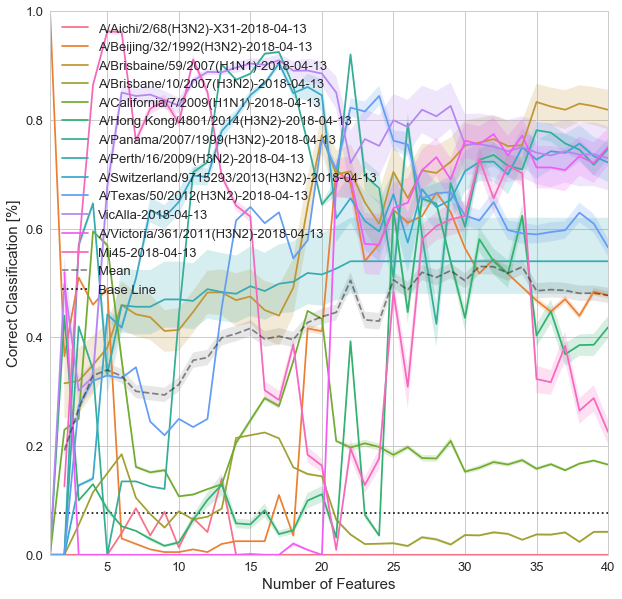

In [244]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True )
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
#ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Analyte Batch", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="unit", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)

ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



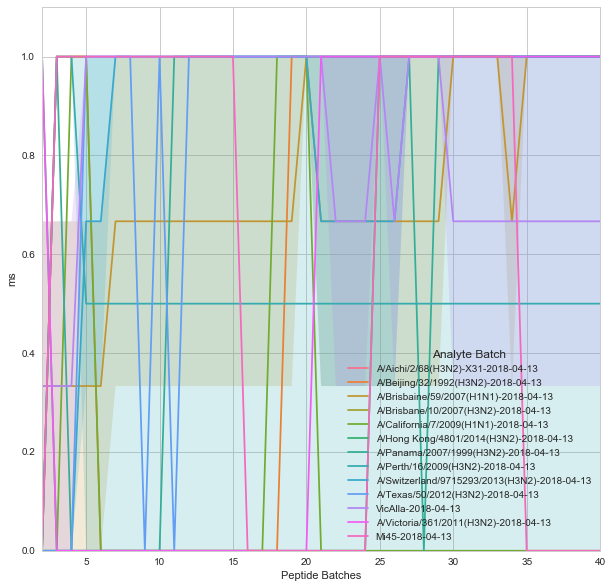

In [245]:


fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m)
ax.set_ylim(0,1.1)
plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



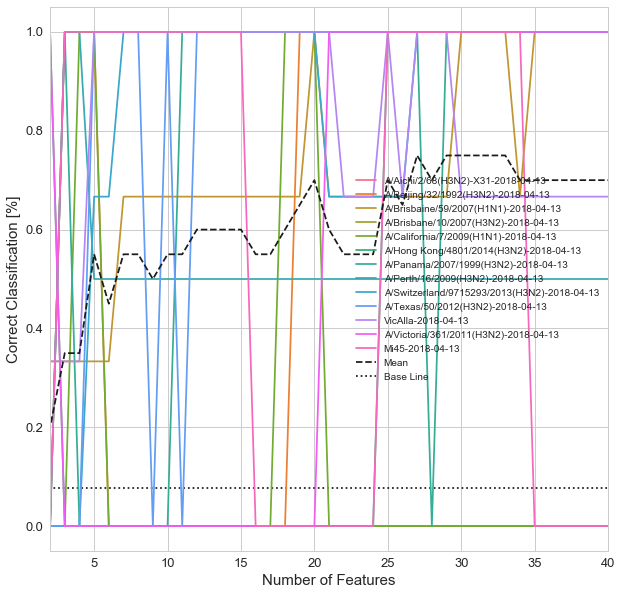

In [246]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 

ax.plot(x,y,c="k",linestyle="--", label = "Mean")
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
plt.legend()

#ax.set_ylim(0,1.1)
plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



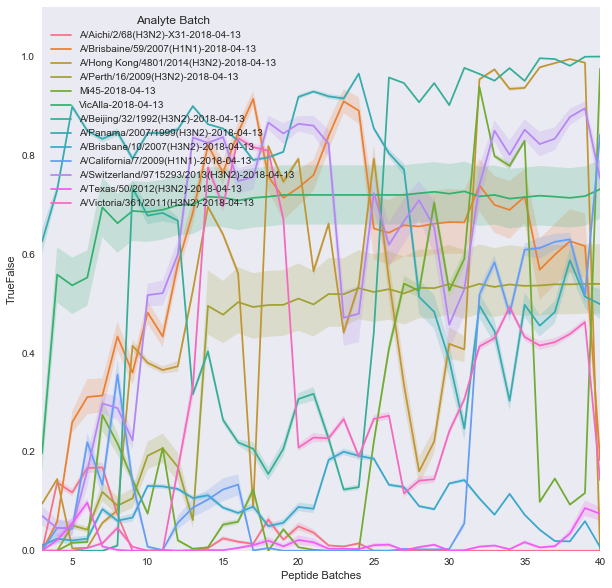

In [177]:
sns.set(style="dark", palette="muted", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax.set_ylim(0,1.1)
plt.show()

In [128]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [129]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning:

The following kwargs were not used by contour: 'label'



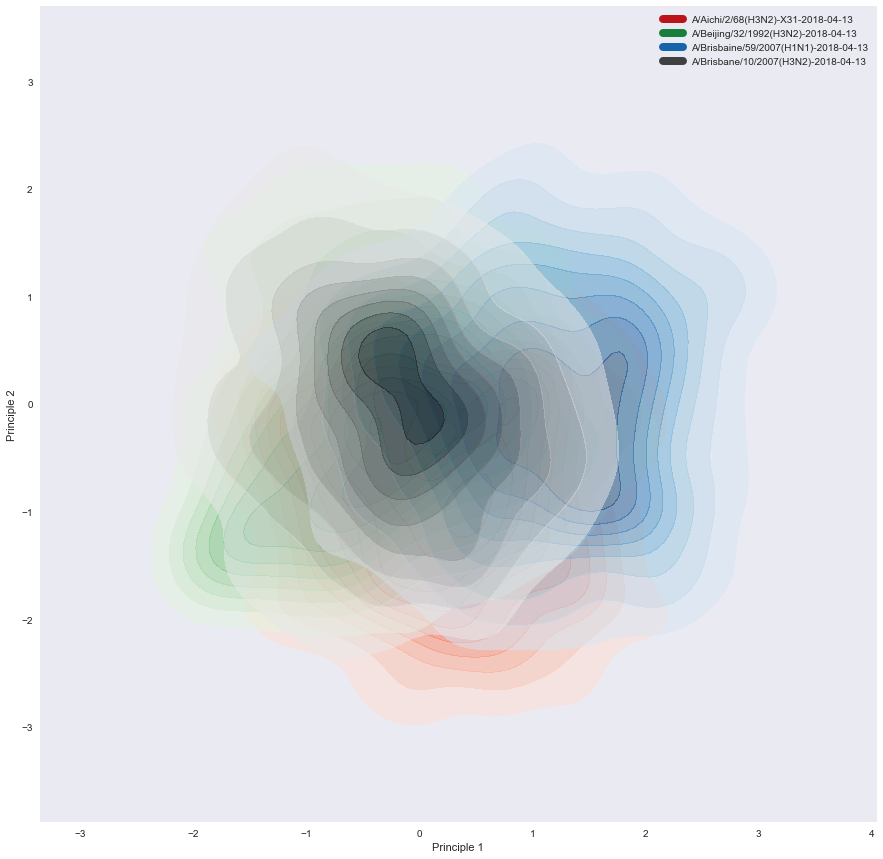

In [130]:

fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [131]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

2.2.3


In [132]:
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(200).clean()
from sklearn import preprocessing

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



In [133]:
test_data = data.x_pca_fit().transform(data.x)


In [134]:
le = preprocessing.LabelEncoder()

In [135]:
le.fit(data.y_names)
cs = le.transform(data.y_names)

In [136]:
colors =cs.astype(float) / cs.max()

In [137]:


import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    mode='markers',
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.1
    )
)

this = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [78]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

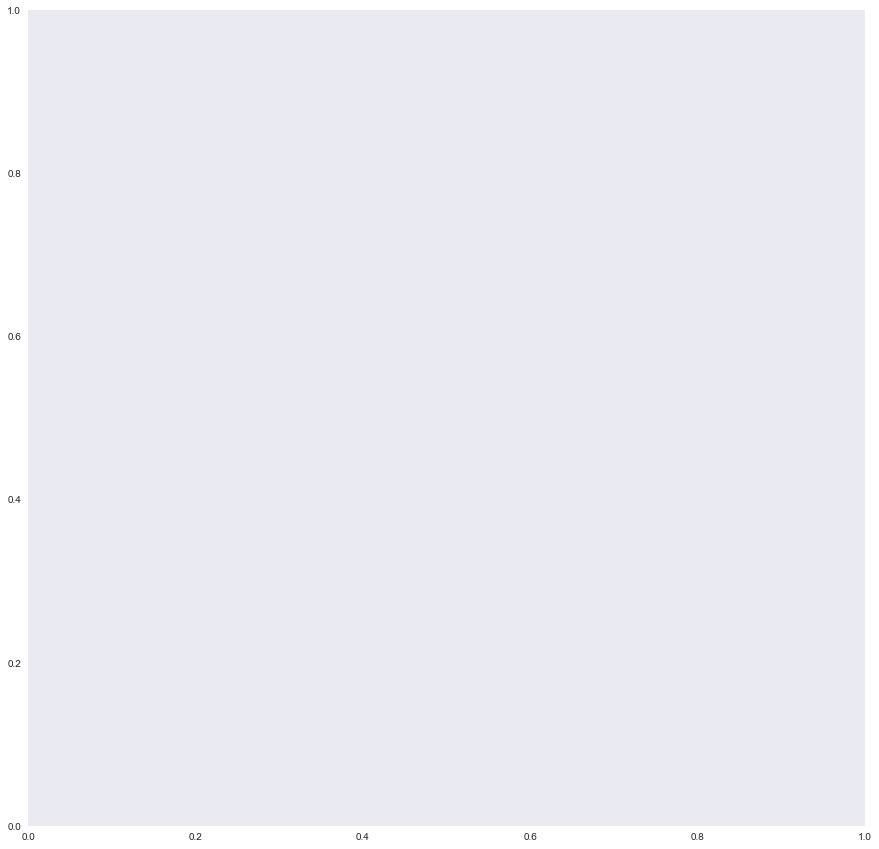

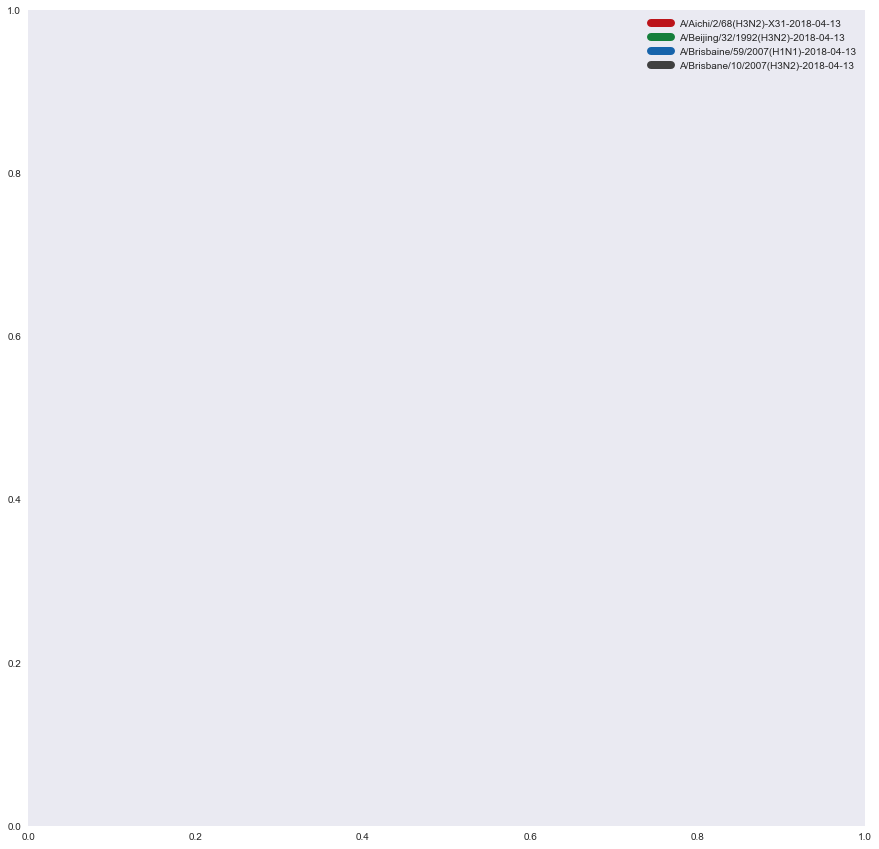

In [79]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

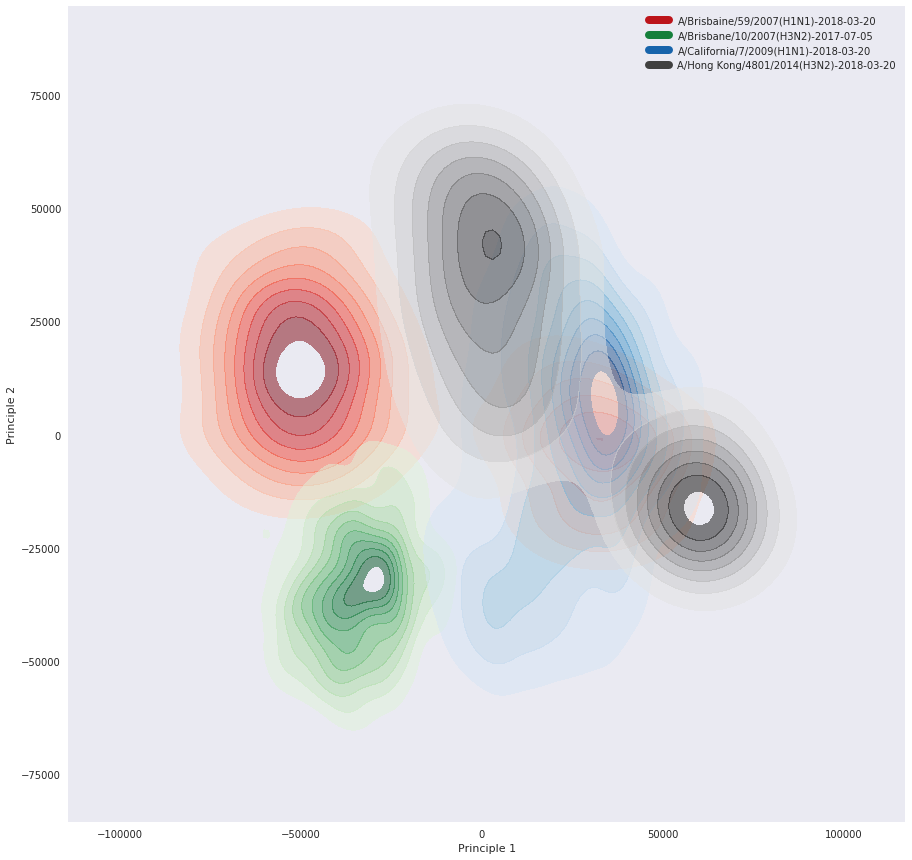

In [652]:
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()